# Updates

In [1]:
import sys
sys.path.append('/Users/spindicate/Documents/programming/zooscraper/')

import django
django.setup()

In [2]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"

In [5]:
from datetime import datetime as dt, timedelta
import pandas as pd

In [6]:
from casestudy.see19.see19 import CaseStudy, get_baseframe
from see19.constants import COUNT_TYPES

In [7]:
from casestudy.update import ExceptionLogger
from casestudy.tweetbot import TweetBot

In [8]:
baseframe = get_baseframe()

In [9]:
LOG_PATH = '/Users/spindicate/Documents/programming/zooscraper/casestudy/tweetbot/tweet_logs/'
filename = 'twitter-{}.log'.format(dt.now().strftime('%Y-%m-%d'))
logfile = LOG_PATH + filename
exc_logger = ExceptionLogger(logfile)

In [10]:
tweetbot = TweetBot(test=True, wait=False)
# tweetbot = TweetBot()

In [11]:
countries = [
    'United States of America (the)',
    'Brazil', 
    'Australia', 
    'Japan', 'Singapore', 'Taiwan',  'Korea (the Republic of)',
    'Hong Kong', 
    'Malaysia',
    'Canada', 'Italy',
    'Germany', 
    'Sweden',
    'United Kingdom of Great Britain and Northern Ireland (the)',
    'France', 
    'Norway',  
    'Spain', 
    'Denmark', 'Finland',
]

factors_with_dmas = ['strindex']
factor_dmas = {factor: 28 for factor in factors_with_dmas}
mobi_dmas = {factor: 1 for factor in [*CaseStudy.GMOBIS, *CaseStudy.AMOBIS]}
factors = factors_with_dmas + CaseStudy.GMOBIS + ['A65PLUSB'] + CaseStudy.AMOBIS

casestudy = CaseStudy(
    baseframe, countries=countries, count_dma=3, factors=factors, 
    factor_dmas=factor_dmas, mobi_dmas=mobi_dmas, start_hurdle=dt(2020,3,1), start_factor='date', lognat=True,
    min_deaths=1,
)

## Custom Comparison Chart

In [12]:
region_groups = [
    ['British Columbia', 'Ontario', 'New South Wales'],
    ['Illinois', 'Ohio', 'Massachusetts'], 
    ['California', 'Florida', 'Washington'],
    ['Texas', 'Georgia', 'Tennessee'],
    ['Sweden', 'Norway', 'Finland', 'Denmark'],
    ['Spain', 'Germany', 'France'],
    ['Lombardia', 'New York', 'New Jersey'],
    ['Sao Paulo', 'Rio De Janeiro'],
    ['Hong Kong', 'Singapore'],
    ['Japan', 'Malaysia', 'Korea, South']
    
]
for regions in region_groups:
    for count_type in ['cases', 'deaths']:
        wrapped_chart = exc_logger.wrap()(tweetbot.count_comparison)
        wrapped_chart(casestudy, count_type, regions)

    wrapped_chart = exc_logger.wrap()(tweetbot.amobi_comparison)
    wrapped_chart(casestudy, regions)

    status = """
        Change in Apple Mobility Index (driving) along with New Case and Fatality updates for {}
    """.format(' & '.join(regions))

    wrapped_tweet = exc_logger.wrap(timeout=16*60)(tweetbot.new_tweet)
    wrapped_tweet(status)

Running count_comparison...


Running count_comparison...


Running amobi_comparison...


Running new_tweet...
FileNotFoundError(2, 'No such file or directory')
Running count_comparison...


Running count_comparison...


Running amobi_comparison...


Running new_tweet...
FileNotFoundError(2, 'No such file or directory')
Running count_comparison...


Running count_comparison...


Running amobi_comparison...


Running new_tweet...
FileNotFoundError(2, 'No such file or directory')
Running count_comparison...


Running count_comparison...


Running amobi_comparison...


Running new_tweet...
FileNotFoundError(2, 'No such file or directory')
Running count_comparison...


Running count_comparison...


Running amobi_comparison...


Running new_tweet...
FileNotFoundError(2, 'No such file or directory')
Running count_comparison...


Running count_comparison...


Running amobi_comparison...


Running new_tweet...
FileNotFoundError(2, 'No such file or directory')
Running count_comparison...


Running count_comparison...


Running amobi_comparison...


Running new_tweet...
FileNotFoundError(2, 'No such file or directory')
Running count_comparison...


Running count_comparison...


Running amobi_comparison...


Running new_tweet...
FileNotFoundError(2, 'No such file or directory')
Running count_comparison...


Running count_comparison...


Running amobi_comparison...


Running new_tweet...
FileNotFoundError(2, 'No such file or directory')
Running count_comparison...


Running count_comparison...


Running amobi_comparison...


Running new_tweet...
FileNotFoundError(2, 'No such file or directory')


## Wave Analysis

In [13]:
df_ex = casestudy.df[casestudy.df.country_code != 'BRA']
df_braz = casestudy.df[casestudy.df.country_code == 'BRA']
dfs = {'ex_BRA': df_ex, 'BRA': df_braz}

[autoreload of zooscraper.settings failed: Traceback (most recent call last):
  File "/Users/spindicate/Documents/programming/envs/zooenv/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/spindicate/Documents/programming/envs/zooenv/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/

Running wavefinder...


/Users/spindicate/Documents/programming/zooscraper/casestudy/tweetbot/tweetbot.py:209: RuntimeWarning: invalid value encountered in double_scalars
  test_med = end_comp / start_comp
/Users/spindicate/Documents/programming/zooscraper/casestudy/tweetbot/tweetbot.py:210: RuntimeWarning: invalid value encountered in double_scalars
  test_far = end_comp / stretch_comp
/Users/spindicate/Documents/programming/zooscraper/casestudy/tweetbot/tweetbot.py:209: RuntimeWarning: divide by zero encountered in double_scalars
  test_med = end_comp / start_comp
/Users/spindicate/Documents/programming/zooscraper/casestudy/tweetbot/tweetbot.py:211: RuntimeWarning: divide by zero encountered in double_scalars
  test_close = end_comp / close_comp
/Users/spindicate/Documents/programming/zooscraper/casestudy/tweetbot/tweetbot.py:211: RuntimeWarning: invalid value encountered in double_scalars
  test_close = end_comp / close_comp
/Users/spindicate/Documents/programming/zooscraper/casestudy/tweetbot/tweetbot.py:

Running multiline_comparison...


Running scatterflow...


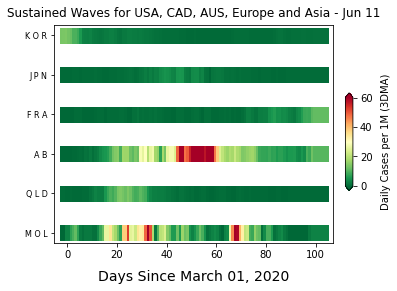

Running new_tweet...
Waiting 15 mins
Running wavefinder...
Running multiline_comparison...


Running scatterflow...


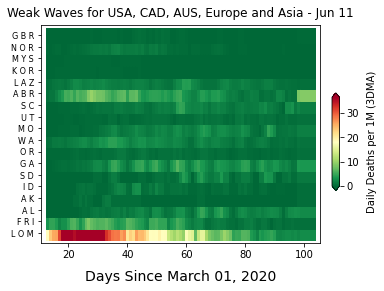

Running new_tweet...
Waiting 15 mins
Running wavefinder...
Running scatterflow...


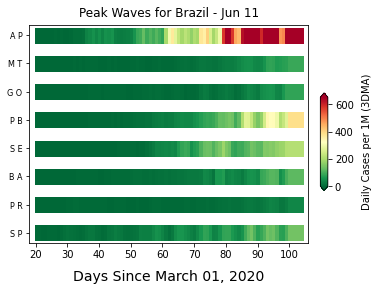

Running scatterflow...


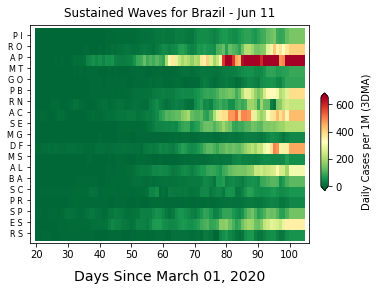

Running scatterflow...


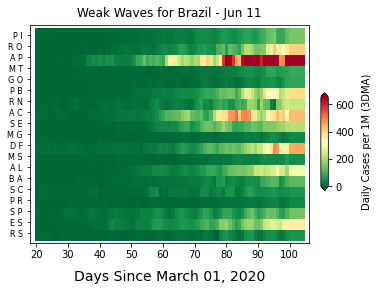

Running new_tweet...
Waiting 15 mins
Running wavefinder...
Running scatterflow...


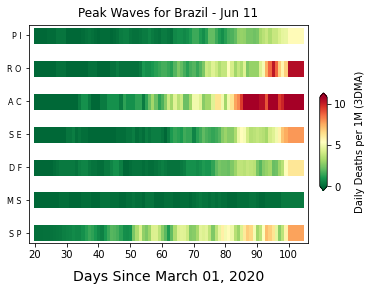

Running scatterflow...


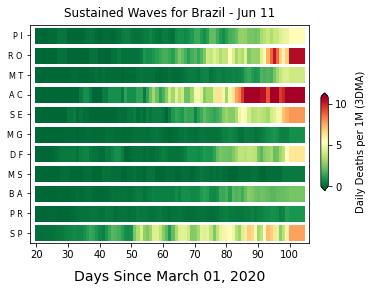

Running scatterflow...


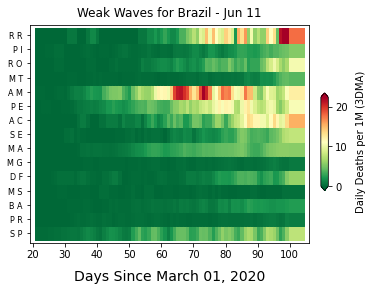

Running new_tweet...
Waiting 15 mins


In [14]:
for key, df in dfs.items():
    for count_type in ['cases', 'deaths']:
        comp_category = count_type + '_new_dma_per_1M'
        wrappedfinder = exc_logger.wrap()(tweetbot.wavefinder)
        wave_types, regions_str, end_date = wrappedfinder(df, comp_category, key)
        
        for wave_type, regions in wave_types.items():
            title = ' '.join(wave_type.split('_')).title() + 's' + ' for {} - {}'.format(regions_str, end_date.strftime('%b %d'))

            if len(regions) == 0:
                pass
            if len(regions) <= 4 and len(regions) > 0:
                wrapped_chart = exc_logger.wrap()(tweetbot.multiline_comparison)
                wrapped_chart(casestudy, comp_category, regions, title)

            elif len(regions) > 4 and len(regions) <= 20:
                wrapped_chart = exc_logger.wrap()(tweetbot.scatterflow)
                wrapped_chart(casestudy, comp_category, regions, title)

        num_regions = df.region_name.unique().shape[0]
        status = """
        Wave Update for New {}. Out of {} regions in {}, {} regions are experiencing a weak wave, {} are experiencing a sustained wave, and {} peaking. 
        """.format(
            count_type.capitalize(), num_regions, regions_str,
            len(wave_types['weak_wave']), 
            len(wave_types['sustained_wave']), 
                   str(len(wave_types['peak_wave'])) + ' is' if len(wave_types['peak_wave']) == 1 else str(len(wave_types['peak_wave'])) + ' are'
        )

        wrapped_tweet = exc_logger.wrap(timeout=16*60)(tweetbot.new_tweet)
        wrapped_tweet(status)

# Testing Updates

In [13]:
casestudy = CaseStudy(
    baseframe, countries='United States of America (the)',
    start_hurdle=dt(2020,4,26), start_factor='date', count_dma=7,
    min_deaths=1,
)

In [12]:
wrapped_chart = exc_logger.wrap()(tweetbot.positivity_bar)
wrapped_chart(casestudy)

status = """Testing efficiency is strong in the US, with vast majority of states below the key 10% positivity threshold
#COVID19 #COVID #Covid19usa #coronavirus #c19
"""
wrapped_tweet = exc_logger.wrap(timeout=16*60)(tweetbot.new_tweet)
wrapped_tweet(status)

Running positivity_bar...
AssertionError('The casestudy object does not have data for as of the required date Jun 11, 2020')
Running new_tweet...
Waiting 0 mins


Running positivity_race...


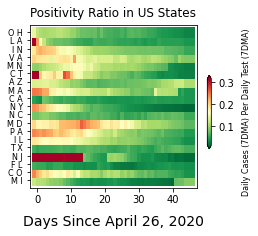

Running new_tweet...
TweepError('Invalid file type for image: image/svg+xml')


In [22]:
wrapped_chart = exc_logger.wrap()(tweetbot.positivity_race)
wrapped_chart(casestudy)

status = """Positivity ratio in the most impacted US states in the past month  #covid19 #covid #c19 #coronavirus
    """
wrapped_tweet = exc_logger.wrap(timeout=15*60)(tweetbot.new_tweet)
wrapped_tweet(status, wait_time=0)

In [27]:
factors_with_dmas = CaseStudy.STRINDEX_CATS
factor_dmas = {factor: 5 for factor in factors_with_dmas}
factors = factors_with_dmas + ['A65PLUSB']
countries = [
    'United States of America (the)', 'Japan', 'Korea (the Republic of)', 
    'Hong Kong', 'Australia', 'Taiwan (Province of China)',
    'Canada', 'Mexico', 'Brazil', 'Spain', 'Germany', 'Italy', 'France',
    'Malaysia', 'Singapore', 'Denmark', 'Sweden', 'Finland', 
]
excluded_regions = ['Saint Pierre and Miquelon', 'Saint Barthelemy', 'Reunion', 'New Caledonia', 'Greenland',
    'French Polynesia', 'French Guiana', 'Faroe Islands',
]
casestudy = CaseStudy(
    baseframe, countries=countries, excluded_regions=excluded_regions, count_dma=3, factors=factors, 
    factor_dmas=factor_dmas, start_hurdle=dt(2020,1,15), start_factor='date', lognat=True,
    min_deaths=1, country_level=True,
)

Running strindex_race...


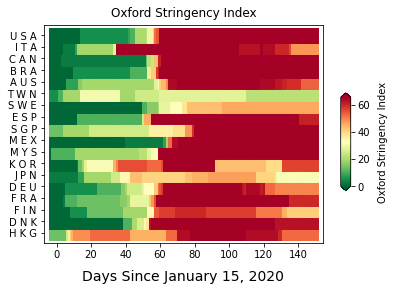

Running new_tweet...
Waiting 0 mins


In [28]:
wrapped_chart = exc_logger.wrap()(tweetbot.strindex_race)
wrapped_chart(casestudy)

status = """Lighter shading towards the right of the graph shows the relaxing of quarantine in some countries #covid19 #covid #c19 #coronavirus
"""
wrapped_tweet = exc_logger.wrap(timeout=360)(tweetbot.new_tweet)
wrapped_tweet(status, wait_time=0)